## Imports

In [4]:
%pylab inline
import pandas as pd 
import requests
from bs4 import BeautifulSoup
import pickle
import seaborn as sns
from datetime import datetime

from helper import clean_data

%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Data loading & cleaning

In [6]:
weekly_pct, vix_close = clean_data()

In [7]:
##create train & validation sets
df_len = weekly_pct.shape[0]
train_vix = weekly_pct.iloc[:df_len-52*4,0].values
train_prime = weekly_pct.iloc[:df_len-52*4,1].values
validation = weekly_pct.iloc[df_len-52*4:df_len-52*2,0].values
validation_prime = weekly_pct.iloc[df_len-52*4-1:df_len-52*2-1,0].values
test = weekly_pct.iloc[df_len-52*2:,0]

In [8]:
def RMSE(validation_points, prediction_points):
   """
   Calculate RMSE between two vectors
   """
   x = np.array(validation_points)
   y = np.array(prediction_points)

   return np.sqrt(np.mean((x - y)**2))


## SARIMAX

In [9]:
import statsmodels.api as sm

In [10]:
validation_prime_df = pd.DataFrame(validation_prime)

In [11]:
sar = sm.tsa.statespace.SARIMAX(train_vix, exog=train_prime, order=(1,0,0), seasonal_order=(0,0,0,12), trend='c').fit()

##extend cell for ease of viewing

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [12]:
pred = sar.forecast(52*2,exog=validation_prime_df)

In [13]:
RMSE(validation,pred)

0.04007006472185404

In [14]:
res = []
for i in range(1,10):
    sar = sm.tsa.statespace.SARIMAX(train_vix, exog=train_prime, order=(i,0,0), seasonal_order=(0,0,0,12), trend='c').fit()
    pred = sar.forecast(52*2,exog=validation_prime_df)
    res.append([i,RMSE(validation,pred)])
    

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [15]:
res

[[1, 0.04007006472185404],
 [2, 0.04007417589137762],
 [3, 0.040083102214736495],
 [4, 0.04010045059351933],
 [5, 0.040079337089347834],
 [6, 0.04003962256756073],
 [7, 0.04017350206499892],
 [8, 0.04018328977242248],
 [9, 0.0401853670292495]]

In [59]:
sar = sm.tsa.statespace.SARIMAX(train_vix, order=(1,0,0), seasonal_order=(0,0,0,12), trend='c').fit()
pred = sar.forecast(52*2)
RMSE(validation,pred)


0.03999100140601754

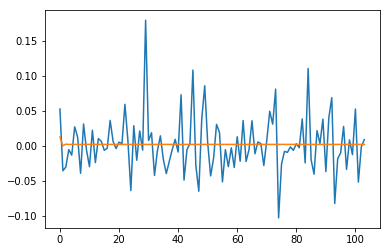

In [60]:
plt.plot(validation)
plt.plot(pred)